In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy as cp

In [2]:
N = 600

t = np.arange(0, N, 1).reshape(-1,1)
# 각 숫자에다가 랜덤 오차항을 더함 
t = np.array([t[i] + np.random.rand(1)/4 for i in range(len(t)) ]) 
# 각 숫자에다가 랜덤 오차항을 뺌
t = np.array([t[i] - np.random.rand(1)/7 for i in range(len(t)) ])
t = np.array(np.round(t,2))

x1 = np.round((np.random.random(N) * 5).reshape(-1,1),2)
x2 = np.round((np.random.random(N) * 5).reshape(-1,1),2)
x3 = np.round((np.random.random(N) * 5).reshape(-1,1),2)

n = np.round((np.random.random(N)*2).reshape(-1,1),2)

y = np.array([((np.log(np.abs(2 + x1[t]))  - x2[t-1]**2) + 
               0.02 * x3[t-3]*np.exp(x1[t-1])) for t in range(len(t))])

y = np.round(y+n ,2 )

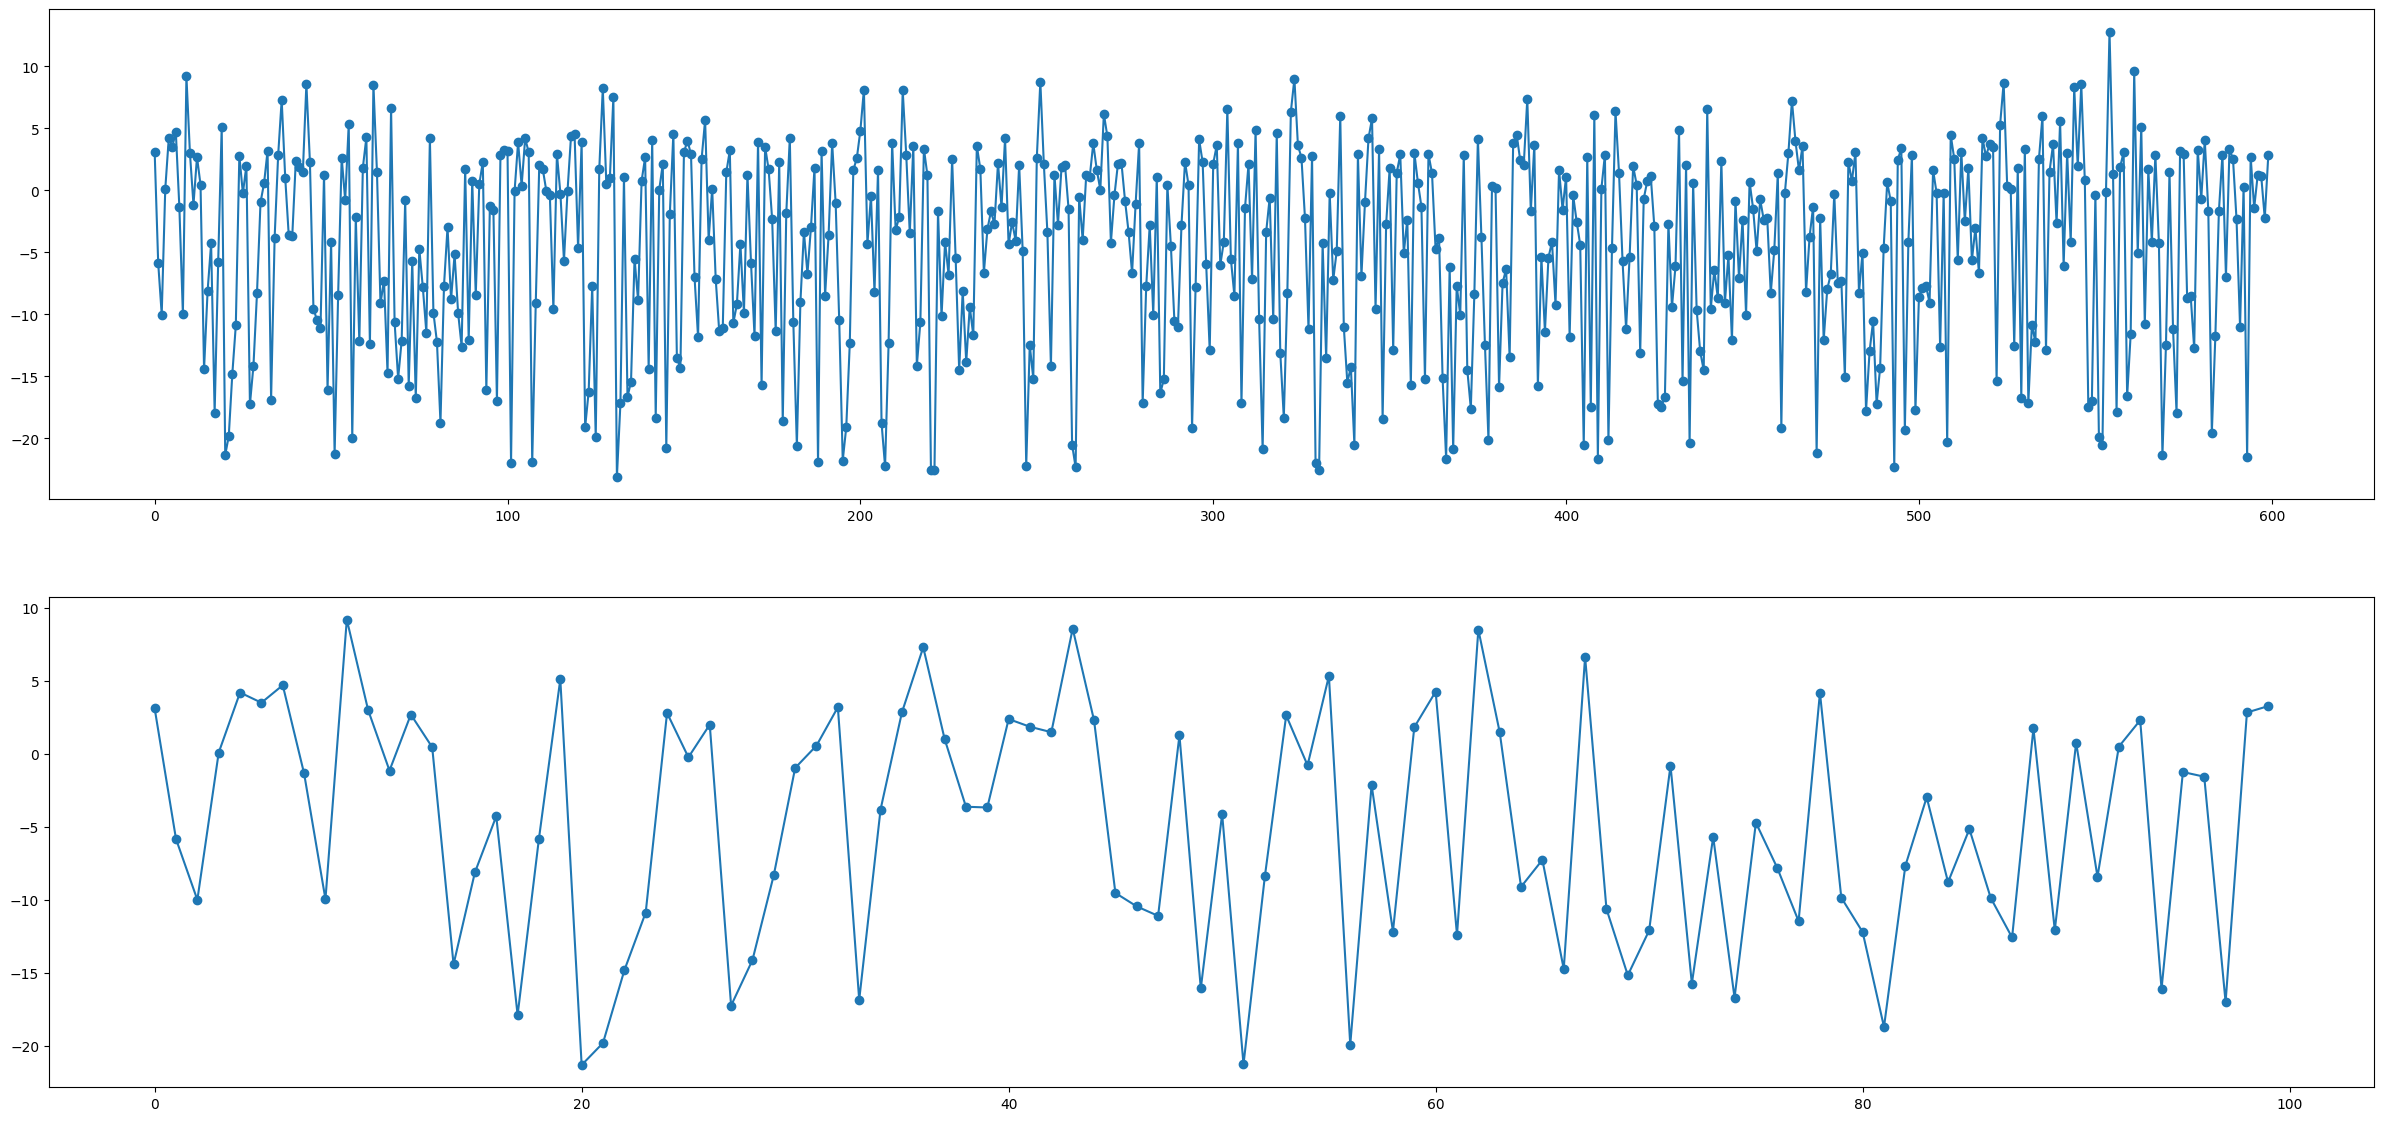

In [3]:
fig, (ax1,ax2) = plt.subplots(nrows=2)
fig.set_size_inches(30,14)

ax1.plot(y, marker = "o") # 600일간 데이터 
ax2.plot(y[:100], marker = "o") # 100일간 데이터 

In [5]:
dataset = pd.DataFrame(np.concatenate((t,x1,x2,x3,y), axis = 1), columns = ['t','x1','x2','x3','y'])
dataset[:7]

,t,x1,x2,x3,y
0,-0.08,0.36,3.08,4.62,3.11
1,1.10,3.30,3.70,3.32,-5.84
2,2.10,0.58,1.77,1.33,-10.01
3,2.98,4.44,1.88,3.41,0.08
4,4.10,3.76,0.46,0.74,4.20
5,4.96,3.98,0.39,0.33,3.50
6,6.13,1.22,1.87,3.20,4.70


In [7]:
deltaT = np.array([(dataset.t[i+1] - dataset.t[i]) for i in range(len(dataset)-1)])
deltaT = np.concatenate((np.array([0]), deltaT))
deltaT[:7]

array([0.  , 1.18, 1.  , 0.88, 1.12, 0.86, 1.17])

In [8]:
dataset.insert(1,'dt', deltaT)

In [9]:
dataset.head()

,t,dt,x1,x2,x3,y
0,-0.08,0.00,0.36,3.08,4.62,3.11
1,1.10,1.18,3.30,3.70,3.32,-5.84
2,2.10,1.00,0.58,1.77,1.33,-10.01
3,2.98,0.88,4.44,1.88,3.41,0.08
4,4.10,1.12,3.76,0.46,0.74,4.20


In [10]:
class WindowSlider(object):
    def __init__(self, window_size = 5):
        self.w = window_size
        self.o = 0
        self.r = 1
        self.l = 0
        self.p = 0
        self.names = []

    def re_init(self, arr):
        arr = np.cumsum(arr)
        return arr- arr[0]
    def collect_windows(self, X, window_size = 5, offset = 0, previous_y = False):
        cols = len(list(X))-1
        N = len(X)
        self.o = offset
        self.w = window_size
        self.l = N - (self.w + self.r) + 1
        if not previous_y:
            self.p = cols * self.w
        if previous_y:
            self.p = (cols+1) * self.w

        if previous_y:
            x = cp.deepcopy(X)
        if not previous_y:
            x = X.drop(X.columns[-1], axis = 1)
        for j, col in enumerate(list(x)):
            for i in range(self.w):
                name = col + ("(%d)" % (i+1))
                self.names.append(name)

        for k in range(self.r):
            name = "dt" + ("(%d)" % (self.w + k + 1))
            self.names.append(name)

        self.names.append("Y")
        df = pd.DataFrame(np.zeros(shape = (self.l, (self.p + self.r +1))), columns = self.names)

        for i in range(self.l):
            slices = np.array([])

            for p in range(X.shape[1]):
                line = X.values[i:self.w+i, p]
                if p == 0:
                    line = self.re_init(line)
                slices = np.concatenate((slices,line))
            line = np.array([self.re_init(X.values[i:i+self.w+self.r, 0])[-1]])
            y = np.array(X.values[self.w + i + self.r - 1, -1]).reshape(1,)
            df.iloc[i,:] = slices

        return df

NameError: name 'bl_y' is not defined

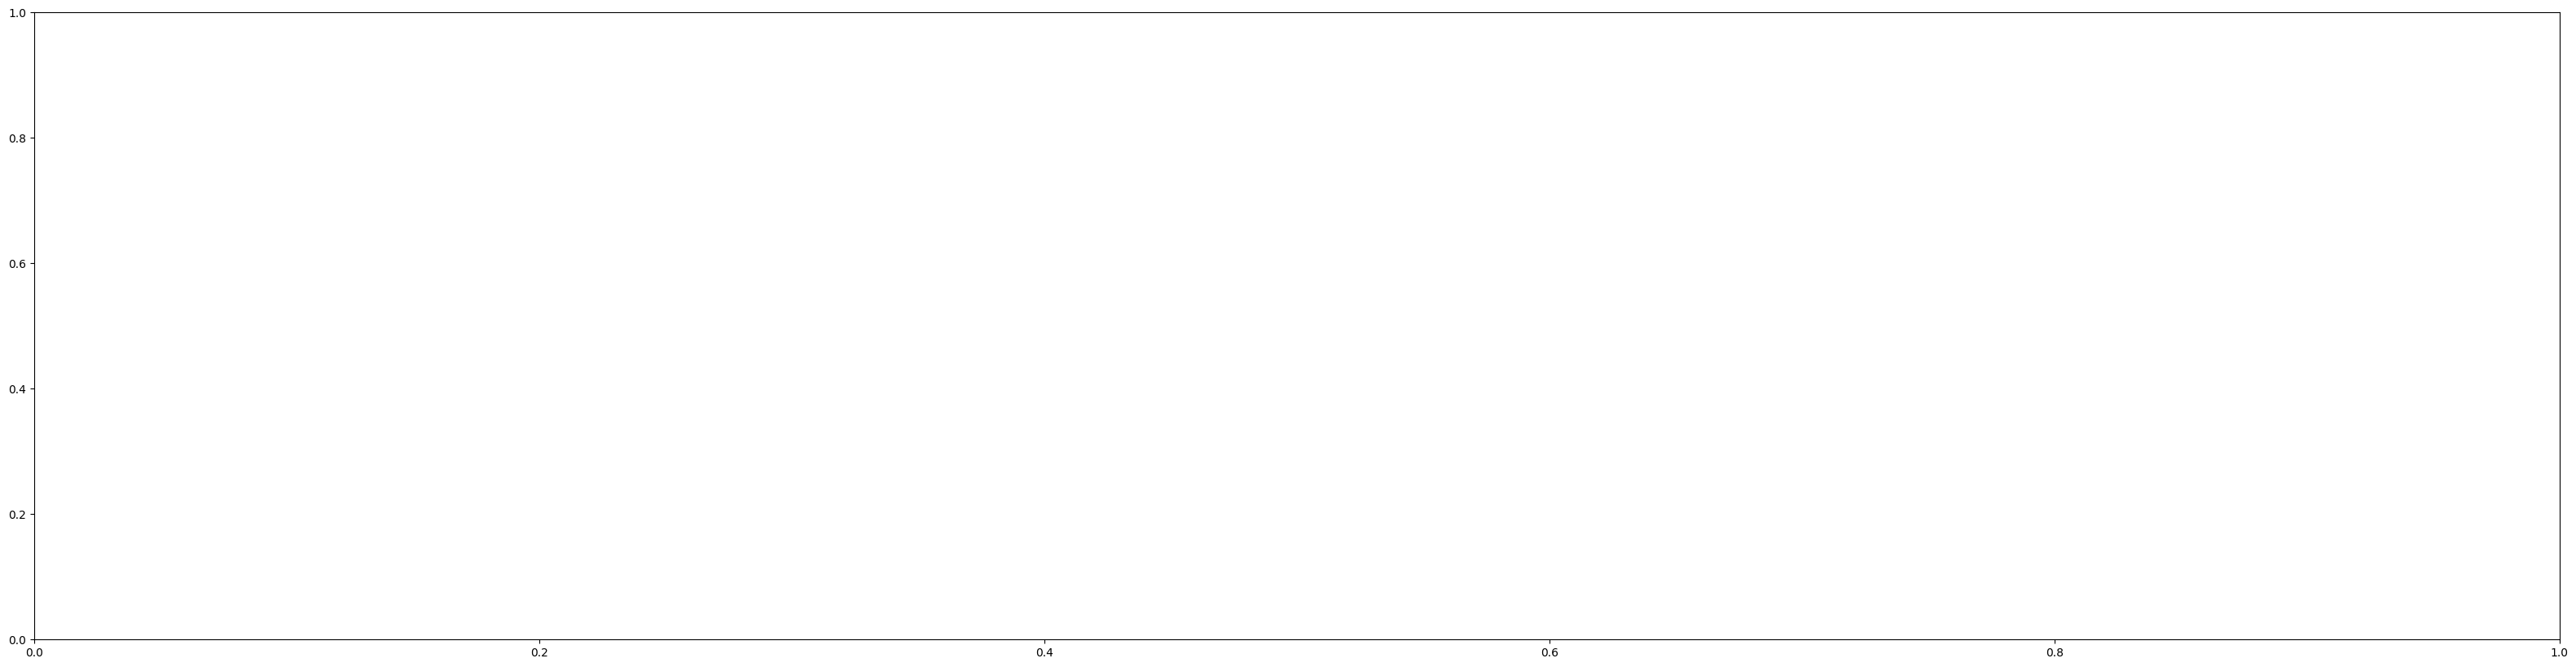

In [15]:
fig, ax1  = plt.subplots(nrows=1)
fig.set_size_inches(40,10)

ax1.plot(bl_y, marker = "o" , label = "actual") # 100일간 데이터 
ax1.plot(bl_y_pred, marker = "o", label = "predict") # 100일간 데이터 
ax1.legend(prop={'size':30})